## ANÁLISIS DE RED DE CO-EXPRESIÓN GÉNICA DE DIEZ FACTORES DE TRANSCRIPCIÓN DE A.THALIANA

**Autores**: Mario Ruiz Velázquez y Pedro J. Bejarano Díaz

**Contacto**: marioruizvelazquez@gmail.com/ pedro.bejarano@jerez.es

**Fecha**: 2/02/2019


**1.INTRODUCCIÓN**

Las redes de coexpresión génica están formadas por diferentes genes que se expresan de manera conjunta. 
Un estudio interesante sería construir una red de corregulación génica, que es una red dirigida, y que nos permitiría analizar cómo están regulados los genes  de esta red.

Los factores de transcripción son proteínas que se encargan de regular la transcripción de los genes que se encuentran en el ADN. De manera que, si se obtienen las listas de los genes diana para cada uno de los diferentes factores de transcripción, se podría analizar como están regulados estos genes. 


**2.OBJETIVOS**

El objetivo de esta tarea es construir una red cotranscripcional para los genes dianas de 10 factores de transcripción de Arabidopsis Thaliana

**ANÁLISIS CHIP-SEQ**

Utilizando el pipeline de chip seq elaborado anteriormente, se obtienen los genes dianas para cada uno de los factores de transcripción que se han utilizado. A continuación se muestran cuáles son estos factores y las funciones biológicas que tienen en Arabidopsis Thaliana:

**ARF6**: Es un factor de transcripción relacionado con la respuesta a auxina.  La lista de genes diana de este factor es la siguiente: [Genes diana ARF6](AT1G30330.txt)

**JAG**: Es un factor de transcripción que forma parte del dedo de zinc que es necesario para la forma adecuada de los órganos laterales y para inducir la proliferación del tejido del órgano lateral. Junto con NUB, está involucrado en el desarrollo de estambres y carpelos. La lista de genes diana de este factor es la siguiente: [Genes diana JAG](AT1G68480.txt)

**PIF4**: Es un factor de transcripción que regula negativamente las respuestas de luz roja mediadas por phyB. Involucrado en la respuesta de evitación de sombra. La lista de genes diana de este factor es la siguiente: [Genes diana PIF4](AT2G43010.txt)

**CCA1**: Es un factor de transcripción que participa en la regulación del ciclo circadiano. La lista de genes diana de este factor es la siguiente: [Genes diana CCA1](AT2G46830.txt)

**MYB3-R3**: Es un factor de transcripción está relacionado con el bloqueo de la división celular en respuesta al daño del ADN.La lista de genes diana de este factor es la siguiente: [Genes diana MYB3-R3](AT3G09370.txt)

**RBR1**: Es un factor de transcripción que desempeña varias funciones entre las que destacan: la proliferación nuclear en el gametofito femenino. También se requiere para la correcta diferenciación de los tipos de células gametofíticas masculinas. Regula el mantenimiento de las células madre en las raíces de Arabidopsis. La lista de genes diana de este factor es la siguiente: [Genes diana RBR1](AT3G12280.txt)

**IBL1**: Es un factor de transcripción que está actúa como represor transcripcional que regula negativamente el alargamiento de células y órganos en respuesta a la señalización de giberelina (GA) y brasinoesteroides (BR).La lista de genes diana de este factor es la siguiente: [Genes diana IBL1](AT4G30410.txt)

**PI**: Es un factor de transcripción necesario para la especificación de las identidades de pétalos y estambres. a lista de genes diana de este factor es la siguiente: La lista de genes diana de este factor es la siguiente:[Genes diana PI](AT5G20240.txt)

**AGL8** Es un factor de transcripción relacionado con la diferenciación celular y el desarrollo del fruto. La lista de genes diana de este factor es la siguiente:[Genes diana AGL8](AT5G60910.txt)

**TOC1** Es un factor de transcripción que contribuye a la aptitud de la planta (fijación de carbono, biomasa) al influir en el período del reloj circadiano:[Genes diana TOC1](AT5G61380.txt)






**CONSTRUCCIÓN DE LA RED**

Una vez obtenidos los genes diana para los diez factores de transcripción, se va a construir la red de corregulación génica mediante la herramienta **Rstudio**

Para comenzar se crea un fichero de entrada en el que se encuentran los identificadores de los genes.


In [1]:
tf.name <- read.table(file = "target_gen.txt", header = FALSE)[[1]]
length(tf.name)

[1] 10

Posteriormente, se almacenan los genes dianas de los factores de transcripción en un vector y con la función **unique** eliminamos los posibles genes repetidos que hayan podido aparecer. 


In [10]:
genes.in.network <- c()
for(i in 1:length(tfs))
{
  current.tf.file <- paste(tfs[i],".txt",sep="")
  current.tf.data <- read.table(file=current.tf.file,as.is=TRUE)
  current.tf.targets <- current.tf.data[,1]
  genes.in.network <- c(genes.in.network,current.tf.targets)
}

genes.in.network <- unique(genes.in.network)
genes.in.network
length(genes.in.network)

[1] "AT1G18879" "AT1G19530" "AT1G26558" "AT1G43950" "AT1G80160" "AT2G03450"
    [7] "AT2G04630" "AT2G07470" "AT2G13175" "AT2G13970" "AT2G19640" "AT2G29210"
   [13] "AT2G30740" "AT3G09350" "AT3G26600" "AT3G31161" "AT3G31406" "AT3G42060"
   [19] "AT3G44150" "AT3G44690" "AT4G04590" "AT4G08262" "AT4G39680" "AT5G10670"
   [25] "AT5G10850" "AT5G20540" "AT5G58130" "ATCG00020" "ATCG00050" "ATCG00100"
   [31] "ATCG00120" "ATCG00170" "ATCG00180" "ATCG00190" "ATCG00260" "ATCG00310"
   [37] "ATCG00350" "ATCG00360" "ATCG00400" "ATCG00450" "ATCG00500" "ATCG00510"
   [43] "ATCG00550" "ATCG00065" "ATCG00670" "ATCG00930" "ATCG01010" "ATCG01020"
   [49] "ATCG01050" "ATCG01080" "ATCG01120" "ATCG01200" "AT1G01140" "AT1G01830"
   [55] "AT1G09440" "AT1G09950" "AT1G11120" "AT1G14430" "AT1G15370" "AT1G16500"
   [61] "AT1G19050" "AT1G21730" "AT1G24625" "AT1G30320" "AT1G32360" "AT1G33250"
   [67] "AT1G49520" "AT1G53090" "AT1G62870" "AT1G63820" "AT1G65810" "AT1G66140"
   [73] "AT1G67500" "AT1G67510" "AT1G68480" "AT1G69420" "AT1G71390" "AT1G71710"
   [79] "AT1G76580" "AT1G76890" "AT1G78490" "AT1G80831" "AT2G10940" "AT2G17610"
   [85] "AT2G17700" "AT2G18240" "AT2G20180" "AT2G21210" "AT2G22530" "AT2G26330"
   [91] "AT2G30360" "AT2G31400" "AT2G32450" "AT2G33310" "AT2G34710" "AT2G36090"
   [97] "AT2G39130" "AT2G42280" "AT2G44798" "AT2G45960" "AT2G46720" "AT2G47370"
  [103] "AT3G03690" "AT3G03830" "AT3G05690" "AT3G06750" "AT3G06760" "AT3G06870"
  [109] "AT3G07450" "AT3G13820" "AT3G17998" "AT3G23171" "AT3G24670" "AT3G25180"
  [115] "AT3G26710" "AT3G28220" "AT3G50651" "AT3G52105" "AT3G54010" "AT3G57810"
  [121] "AT3G58080" "AT3G58560" "AT3G59340" "AT3G59765" "AT3G61250" "AT3G61470"
  [127] "AT3G61950" "AT4G00870" "AT4G04630" "AT4G13540" "AT4G13840" "AT4G15480"
  [133] "AT4G16140" "AT4G18010" "AT4G22730" "AT4G26090" "AT4G28564" "AT4G29930"
  [139] "AT4G30160" "AT4G30935" "AT4G34131" "AT4G34760" "AT4G35240" "AT4G36780"
  [145] "AT4G36925" "AT4G37540" "AT4G37820" "AT4G38840" "AT5G01880" "AT5G02230"
  [151] "AT5G06660" "AT5G07990" "AT5G11740" "AT5G12043" "AT5G13400" "AT5G15800"
  [157] "AT5G16190" "AT5G21100" "AT5G23290" "AT5G24380" "AT5G24870" "AT5G24910"
  [163] "AT5G28640" "AT5G35407" "AT5G38530" "AT5G39635" "AT5G40540" "AT5G43700"
  [169] "AT5G44210" "AT5G47370" "AT5G50090" "AT5G50950" "AT5G55250" "AT5G58140"
  [175] "AT5G59130" "AT5G60980" "AT5G62070" "AT5G63180" "AT5G64840" "AT5G66770"
  [181] "AT5G66780" "AT5G67270" "AT5G67280" "AT5G67470" "AT1G01030" "AT1G01060"
  [187] "AT1G01100" "AT1G01260" "AT1G01320" "AT1G01380" "AT1G01390" "AT1G01430"
  [193] "AT1G01471" "AT1G01490" "AT1G01550" "AT1G01620" "AT1G01630" "AT1G01720"
  [199] "AT1G01950" "AT1G02065" "AT1G02190" "AT1G02228" "AT1G02230" "AT1G02340"
  [205] "AT1G02350" "AT1G02400" "AT1G02560" "AT1G02590" "AT1G02630" "AT1G02670"
  [211] "AT1G02800" "AT1G02816" "AT1G03090" "AT1G03130" "AT1G03220" "AT1G03470"
  [217] "AT1G03600" "AT1G03610" "AT1G03790" "AT1G03800" "AT1G03870" "AT1G03930"
  [223] "AT1G03990" "AT1G04000" "AT1G04370" "AT1G04530" "AT1G04550" "AT1G04690"
  [229] "AT1G05090" "AT1G05150" "AT1G05490" "AT1G05785" "AT1G05805" "AT1G05810"
  [235] "AT1G05835" "AT1G05850" "AT1G05870" "AT1G06040" "AT1G06070" "AT1G06360"
  [241] "AT1G06390" "AT1G06410" "AT1G06570" "AT1G06680" "AT1G06850" "AT1G06980"
  [247] "AT1G07010" "AT1G07090" "AT1G07100" "AT1G07135" "AT1G07150" "AT1G07210"
  [253] "AT1G07500" "AT1G07570" "AT1G07580" "AT1G07670" "AT1G07870" "AT1G07885"
  [259] "AT1G07985" "AT1G08115" "AT1G08200" "AT1G08250" "AT1G08500" "AT1G08570"
  [265] "AT1G08590" "AT1G09070" "AT1G09421" "AT1G09520" "AT1G09530" "AT1G09570"
  [271] "AT1G10020" "AT1G10070" "AT1G10090" "AT1G10120" "AT1G10140" "AT1G10150"
  [277] "AT1G10210" "AT1G10550" "AT1G10560" "AT1G10747" "AT1G10960" "AT1G11210"
  [283] "AT1G11440" "AT1G11545" "AT1G11710" "AT1G11720" "AT1G11820" "AT1G11840"
  [289] "AT1G11970" "AT1G12420" "AT1G12423" "AT1G12440" "AT1G12460" "AT1G12510"
  [295] "AT1G12580" "AT1G12820" "AT1G12845" "AT1G13245" "AT1G13260" "AT1G13640"
  [3

[1] 10770

A continuación, se genera una matriz de adyacencia cuyos valores iniciales serán 0. Si el gen es diana del factor de transcripción, se sustituirá un 0 por 1 en la matriz de adyacencia. 

In [14]:
adj.matrix <- matrix(0,nrow=length(genes.in.network),ncol=length(genes.in.network))

rownames(adj.matrix) <- genes.in.network
colnames(adj.matrix) <- genes.in.network

adj.matrix[1:4,1:4]

for(i in 1:length(tfs))
{
  current.tf <- tfs[i]
  current.tf.file <- paste(current.tf, ".txt",sep="")
  current.tf.data <- read.table(file=current.tf.file,as.is=TRUE)
  current.tf.targets <- current.tf.data[,1]
  adj.matrix[current.tf,current.tf.targets] <-1
}

,AT1G18879,AT1G19530,AT1G26558,AT1G43950
AT1G18879,0,0,0,0
AT1G19530,0,0,0,0
AT1G26558,0,0,0,0
AT1G43950,0,0,0,0


Una vez se obtiene la matriz de adyacencia, se construye su red transcripcional y se obtiene un fichero en formato.gml. Para realiza esto, es necesario descargar el paquete de bioconductor llamado : **igraph**. Puesto que la red generada es demasiado grande, se utilizará la red que contiene los factores de transcripción y mediante las aristas, podemos ver las conexiones que hay entre ellos.


IGRAPH 9b375cf DN-- 10770 15476 -- 
+ attr: id (v/n), name (v/c)
+ edges from 9b375cf (vertex names):
 [1] AT1G68480->AT1G01140 AT1G68480->AT1G01830 AT1G68480->AT1G09440
 [4] AT1G68480->AT1G09950 AT1G68480->AT1G11120 AT1G68480->AT1G14430
 [7] AT1G68480->AT1G15370 AT1G68480->AT1G16500 AT1G68480->AT1G19050
[10] AT1G68480->AT1G21730 AT1G68480->AT1G24625 AT1G68480->AT1G30320
[13] AT1G68480->AT1G32360 AT1G68480->AT1G33250 AT1G68480->AT1G49520
[16] AT1G68480->AT1G53090 AT1G68480->AT1G62870 AT1G68480->AT1G63820
[19] AT1G68480->AT1G65810 AT1G68480->AT1G66140 AT1G68480->AT1G67500
[22] AT1G68480->AT1G67510 AT1G68480->AT1G68480 AT1G68480->AT1G69420
+ ... omitted several edges

IGRAPH 9b3c14b DN-- 10 27 -- 
+ attr: id (v/n), name (v/c)
+ edges from 9b3c14b (vertex names):
 [1] AT1G68480->AT1G68480 AT2G43010->AT2G43010 AT2G43010->AT2G46830
 [4] AT2G43010->AT3G12280 AT2G43010->AT4G30410 AT2G46830->AT2G46830
 [7] AT3G09370->AT2G43010 AT3G09370->AT2G46830 AT3G09370->AT3G12280
[10] AT3G09370->AT4G30410 AT3G09370->AT1G30330 AT3G09370->AT3G09370
[13] AT5G20240->AT1G68480 AT5G20240->AT2G43010 AT5G20240->AT2G46830
[16] AT5G20240->AT4G30410 AT5G20240->AT3G09370 AT5G20240->AT5G20240
[19] AT5G20240->AT5G60910 AT5G20240->AT5G61380 AT5G60910->AT2G43010
[22] AT5G60910->AT3G12280 AT5G60910->AT1G30330 AT5G60910->AT5G60910
+ ... omitted several edges

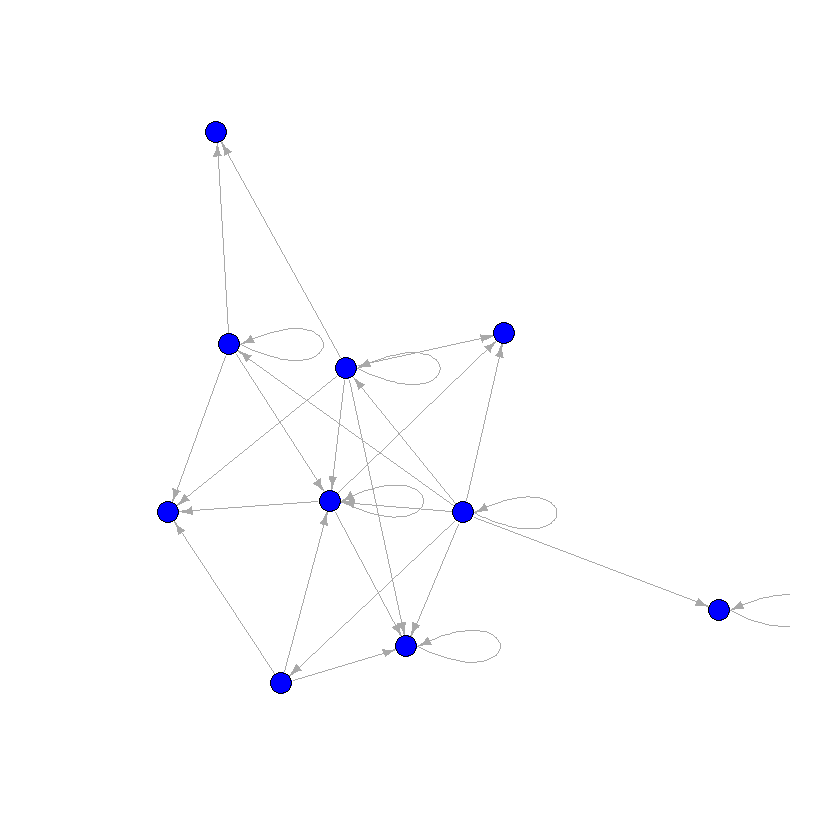

In [16]:
library(igraph)

gene.transcriptional.network <- graph.adjacency(adj.matrix, mode="directed")
write.graph(gene.transcriptional.network,file="transcriptional_gene_network.gml",format="gml")
gene.transcriptional.network <- read.graph(file = "transcriptional_gene_network.gml", format = "gml")
gene.transcriptional.network

tfs.network <- induced.subgraph(gene.transcriptional.network,tfs)
tfs.network

plot.igraph(x = tfs.network,vertex.size=8,edge.arrow.size=0.5,vertex.label="",vertex.color="blue")
write.graph(tfs.network,file="red_transcripcional_tf.gml",format="gml")


El número total de nodos, que son los posibles genes regulados por los factores de transcripción, es de 10770, mientras que el número de aristas, que son las conexiones entre los genes, es de 15476.

Posteriormente, la red transcripcional se visualiza en cytoscape y se obtiene la siguiente imagen:

<img src="images/ red_mario.png">


A partir de la red obtenida, se analizarán los motivos de red que aparezcan en ella. Un motivo de red es un subgrafo que aparece un número significativo de veces, siendo mayor este número al que aparece en una red generada de forma aleatoria y que cumple las mismas propiedades.

Primero, hay que determinar si la red construida es libre de escala. Una red es libre de escala cuando la distribución del grado de los nodos se ajusta a una potencial negativa. Para determinar si la red es o no libre de escala se usará el test de Kolmogorov-Smirnov. En este test se realiza un contraste de hipótesis, en el que la hipótesis nula afirma que la distribución del grado de los nodos se ajusta a una potencial negativa y la hipótesis afirmativa corrobora lo contrario. De acuerdo al contraste de hipótesis planteado para considerar que la red es libre de escala el p-valor obtenido debe ser cercano a 1. 


Call:
lm(formula = log10.degrees.frequencies ~ log10.node.degrees)

Residuals:
       2        3        4        6        8        9 
-0.15480  0.12429  0.10872  0.08678 -0.22982  0.06483 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)
(Intercept)          0.1173     0.2115   0.554    0.609
log10.node.degrees   0.1246     0.2985   0.417    0.698

Residual standard error: 0.1701 on 4 degrees of freedom
Multiple R-squared:  0.04174,	Adjusted R-squared:  -0.1978 
F-statistic: 0.1742 on 1 and 4 DF,  p-value: 0.6978


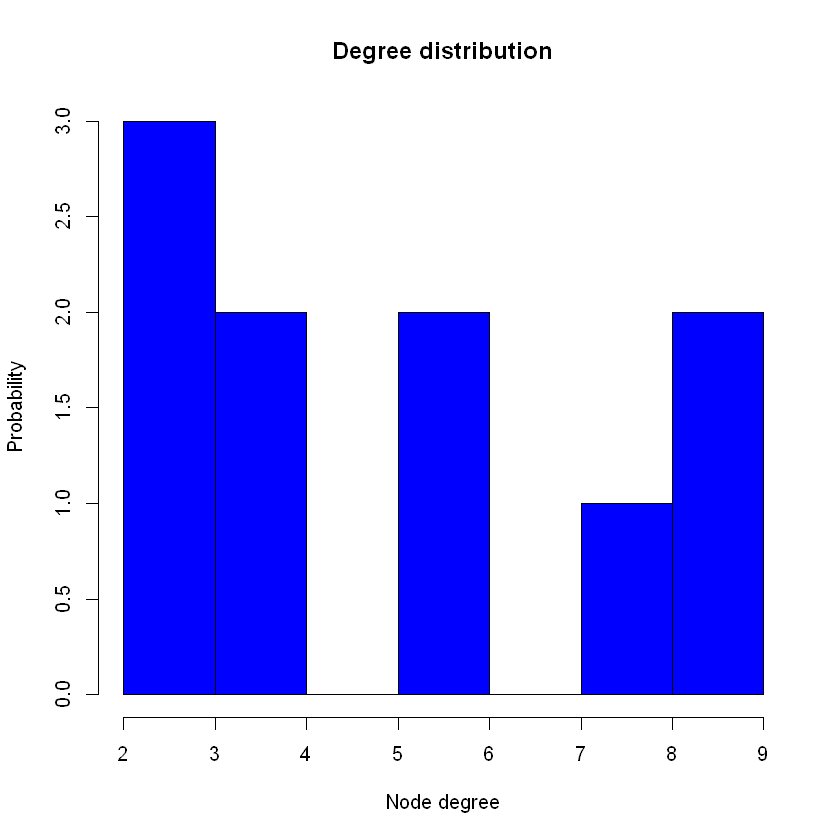

In [4]:
# Calculo del grado de los nodos
network.degrees <- degree(tfs.network)
hist(network.degrees,col="blue",xlab="Node degree", ylab="Probability",main="Degree distribution")

# Calculo de la frecuencia absoluta del grado de los nodos
degree.frequencies <- table(network.degrees)
# Eliminamos nodos con grado 0 para poder aplicar log10

# Transformaci?n logar?tmica
log10.degrees.frequencies <- log10(degree.frequencies)
log10.node.degrees <- log10(as.numeric(names(degree.frequencies)))

# Regresi?n lineal
lm.r <- lm(log10.degrees.frequencies ~ log10.node.degrees)
summary(lm.r)

El **p-valor** obtenido es de 0.6978 por lo tanto, se acepta la hipótesis nula, es decir, que la red se considera **No libre de escala**. Esto significa que la red no tiene hubs. Esto se debe a que al ser factores de transcripción, todos van a tener un gran número de vecino. Esto conlleva que esta red sea robusta a ataques dirigidos y sensible a ataques aleatorios  

Posteriormente, utilizando el modelo de Erdos-Renyi, se generan redes aleatorias que siguen una distribución de Poisson con un número de nodos y aristas dados. Estas redes cumplen las mismas propiedades que nuestra red de interés

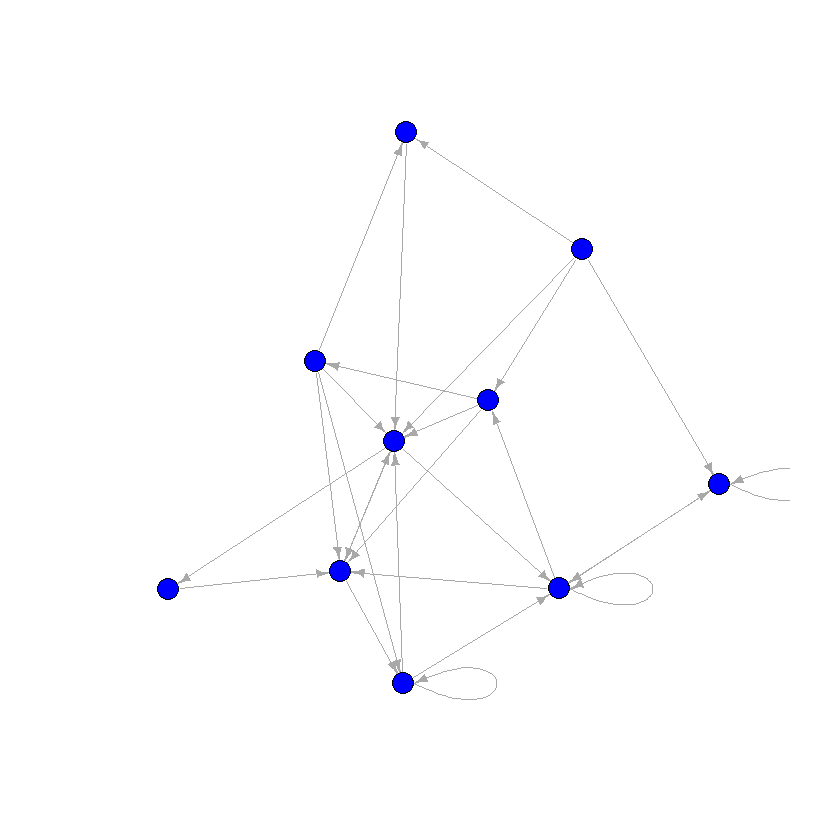

In [17]:
random.graph <- erdos.renyi.game(n= 10, p.or.m=27, type="gnm", directed=TRUE, loops=TRUE)
plot.igraph(x = random.graph,vertex.size=8,edge.arrow.size=0.5,vertex.label="",vertex.color="blue")

Primero, se estudiará si la autorregulación es un motivo de red. Para comprobar esto, se construye una matriz de adyacencia y se suman los elementos de la diagonal principal.

In [18]:
tfs.adjacency <- as.matrix(get.adjacency(tfs.network))
tfs.adjacency
diag(tfs.adjacency)
autorregulation.in.tfs <- sum(diag(tfs.adjacency))
autorregulation.in.tfs

,AT1G68480,AT2G43010,AT2G46830,AT3G12280,AT4G30410,AT1G30330,AT3G09370,AT5G20240,AT5G60910,AT5G61380
AT1G68480,1,0,0,0,0,0,0,0,0,0
AT2G43010,0,1,1,1,1,0,0,0,0,0
AT2G46830,0,0,1,0,0,0,0,0,0,0
AT3G12280,0,0,0,0,0,0,0,0,0,0
AT4G30410,0,0,0,0,0,0,0,0,0,0
AT1G30330,0,0,0,0,0,0,0,0,0,0
AT3G09370,0,1,1,1,1,1,1,0,0,0
AT5G20240,1,1,1,0,1,0,1,1,1,1
AT5G60910,0,1,0,1,0,1,0,0,1,0
AT5G61380,0,1,1,1,0,0,0,0,0,0


AT1G68480 AT2G43010 AT2G46830 AT3G12280 AT4G30410 AT1G30330 AT3G09370 AT5G20240 
        1         1         1         0         0         0         1         1 
AT5G60910 AT5G61380 
        1         0

[1] 6

La suma de la diagonal principal de la matriz es 6. Este número se compara con el número de genes autorregulados en la red creada de forma aleatoria, para ver si este número es significativo y por lo tanto, un motivo de red. Se generan 1000 redes de forma aleatoria. 


autorregulation.in.random <- sum(diag(as.matrix(get.adjacency(random.graph))))
autorregulation.in.random

autorregulation.random.graphs <- vector(length=1000, mode="numeric")

for (i in 1:10000)
{
  random.graph <- erdos.renyi.game(n=10, p.or.m=27, type="gnm", directed=TRUE, loops=TRUE)
  autorregulation.random.graphs[i] <- sum(diag(as.matrix(get.adjacency(random.graph))))
}

mean(autorregulation.random.graphs)
sd(autorregulation.random.graphs)

sum(autorregulation.random.graphs > autorregulation.in.tfs)/10000



Se observa que la media obtenida de estas 1000 redes aleatorias es de 2.69 y la desviación típica es de 1.3. El p-valor obtenido es cercano a 0, 0.0036. Esto significa que el número de redes aleatorias con un número mayor de autorregulación respecto a la red estudiada es casi 0. Por lo tanto, se concluye que la autorregulación es un motivo de red.

A continuación, se estudian los motivos de red de tres nodos. Para ello, se utilizará la función **graph.motifs**, que recibe como entrada una red y un tamaño de subgrado y devuelve el número de veces que se encuentra cada subgrafo en la red.


In [25]:
occurrency.subgraph.three.nodes <- graph.motifs(tfs.network, size=3)
occurrency.subgraph.three.nodes
length(occurrency.subgraph.three.nodes)

[1] NA NA  8 NA  9  0 26 14  0  0  0  0  0  0  0  0

[1] 16

Como se muestra arriba, se estudian en total 16 subgrafos. Se puede observa el número de veces que parecen cada uno de ellos. Por ejemplo. el grafo número 5, aparece 9 veces y es de un gen regulado por otros dos y a su vez ese gen regula a uno de esos dos genes.  

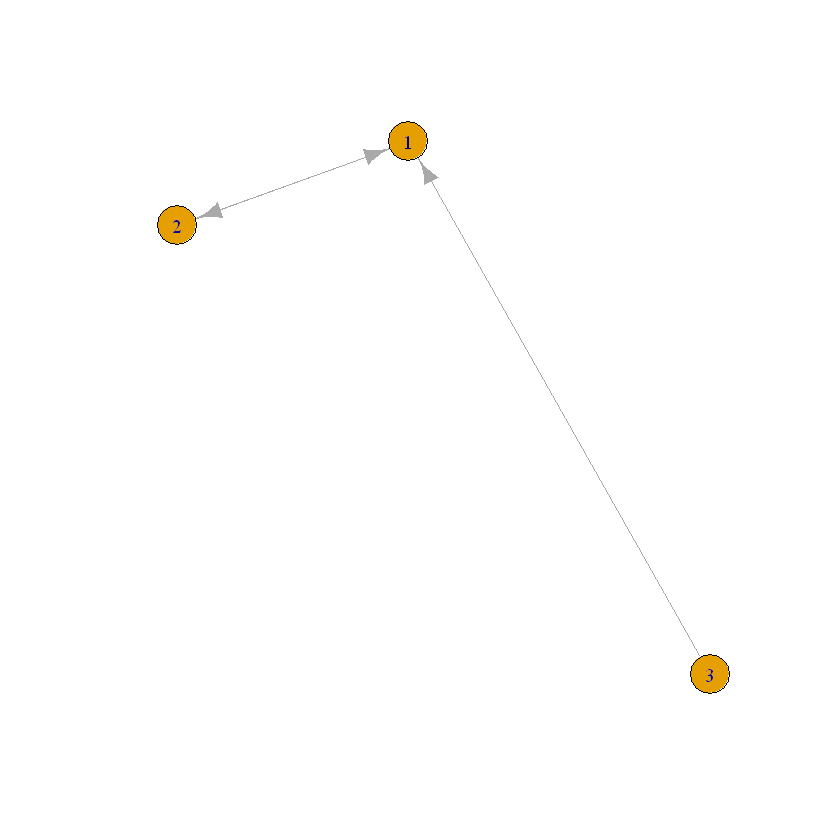

In [26]:
plot.igraph(graph.isocreate(size=3, number=5))

In [ ]:
A continuación, se comprueba si el número de veces que aparece cada subgrafo es significativo con respecto a las redes 
generadas de forma aleatoria.

In [27]:
motifs.3.random.graph <- matrix(0,nrow=1000, ncol=16)
motifs.3.random.graph[1:3,]

for (i in 1:1000)
{
  random.graph <- erdos.renyi.game(n=10, p.or.m=27, type="gnm", directed=TRUE, loops=TRUE)
  motifs.3.random.graph[i,] <- graph.motifs(random.graph, size=3)
}

motifs.3.random.graph[1:3,]
# A continuación,se obtiene el p valor de cada uno de los 16 subgrafos

p.valor <- c()

for (i in 1:16)
{
medias <- mean(motifs.3.random.graph[,i])
sds <- sd(motifs.3.random.graph[,i])
p.valor[i] <- sum(motifs.3.random.graph[,i] > occurrency.subgraph.three.nodes[i])/1000
}

p.valor

0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


NA,NA,7,NA,22,7,9,3,1,6,0,2,0,0,1,0
NA,NA,9,NA,17,5,9,3,0,6,0,2,1,0,0,0
NA,NA,12,NA,15,10,5,3,0,5,2,3,2,1,0,1


[1]    NA    NA 0.389    NA 0.891 0.973 0.000 0.013 0.606 0.975 0.528 0.793
[13] 0.844 0.607 0.416 0.038

Los subgrafos que se consideran motivos de red, serán los que tengan valores de p-valor inferiores a 0.05. Por lo tanto, se obtiene que los subgrafos que son motivos de red y que tienen interés biológico son los subgrafos número 7,8 y 16. Los grafos son los siguientes:

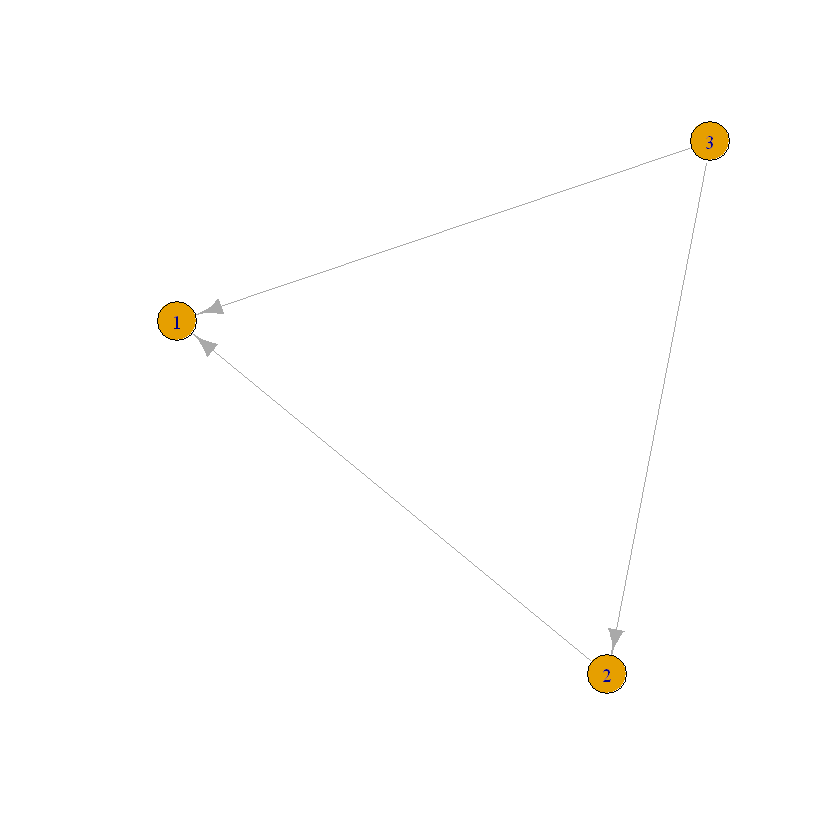

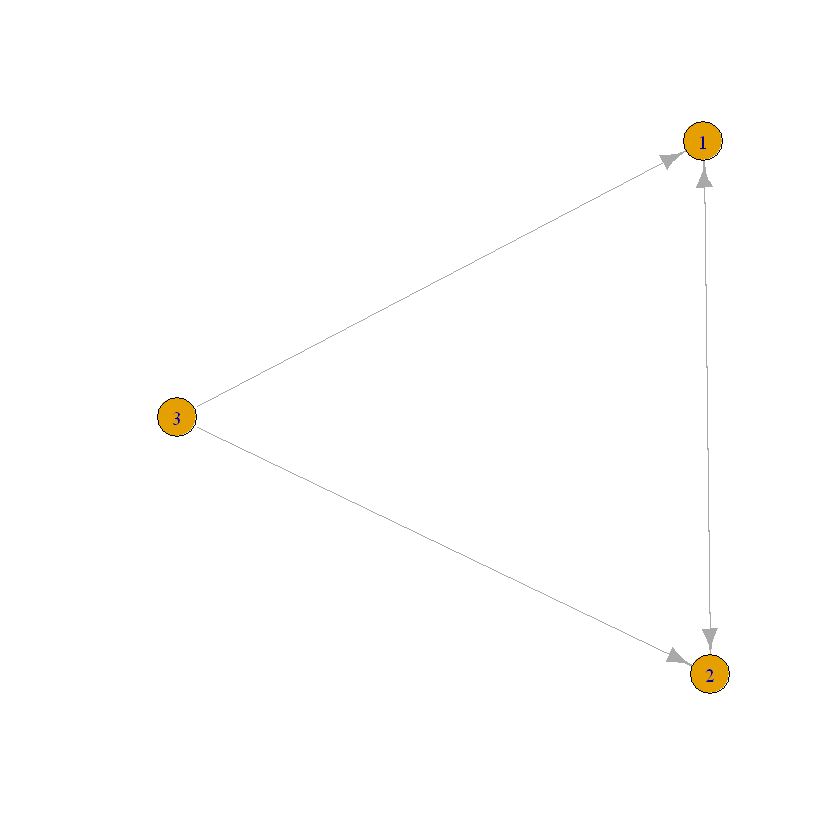

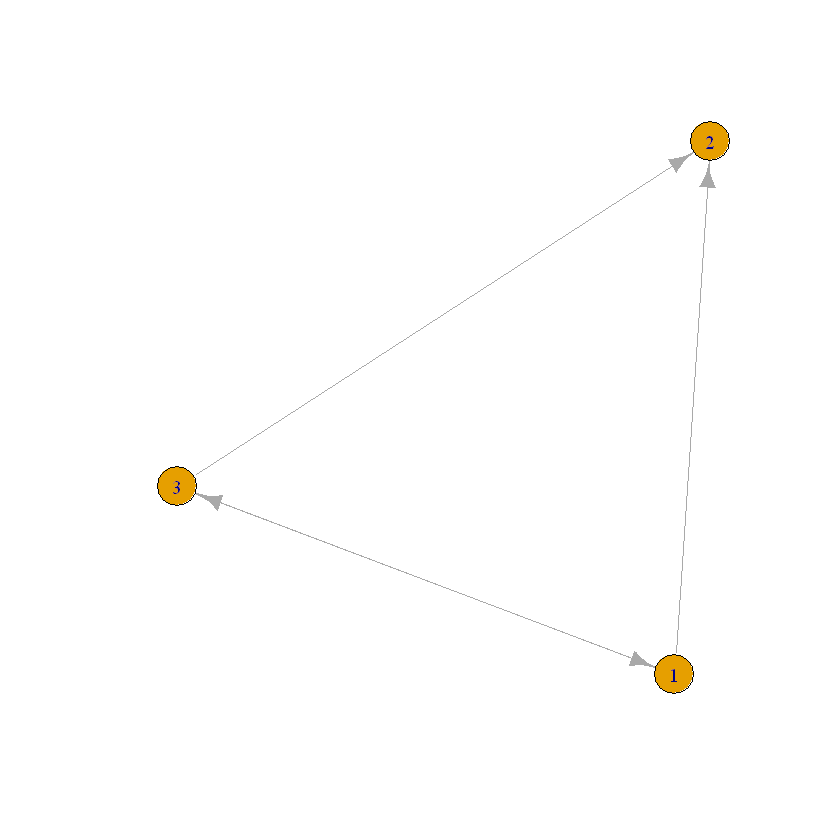

In [32]:
plot.igraph(graph.isocreate(size=3, number=7))
plot.igraph(graph.isocreate(size=3, number=8))
plot.igraph(graph.isocreate(size=3, number=13))


**CONCLUSIONES**

En este estudio se ha analizado diferentes factores de transcripción de A.tahliana. Estos factores, realizan funciones distintas en dicha planta. Sin embargo, se observa en la red generada mediante Cytoscape que todos están conectados entre sí. 

También se ha detectado la existencia de motivos de red. En este caso, el motivo número 7, esta formado por un nodo (3) que regula a otros dos (1 y 2) y a su vez el nodo 2 regula al 1. El motivo número 8, está formado por un nodo que regula a otros dos y a su vez estos dos nodos se regulan entre sí. Por último, el motivo 16 es muy similar al anterior de manera que dos nodos se regulan entre sí y a su vez regulan a otro nodo.

**REFERENCIAS**

**RStudio**

RStudio Team (2015). RStudio: Integrated Development for R. RStudio, Inc., Boston, MA URL http://www.rstudio.com/.
ChIPseeker. Guangchuang Yu, Li-Gen Wang, Qing-Yu He. ChIPseeker: an R/Bioconductor package for ChIP peak annotation, comparison and visualization. Bioinformatics 2015, 31(14):2382-2383.
clusterProfiler. Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-2.

**Bioconductor**

Orchestrating high-throughput genomic analysis with Bioconductor. W. Huber, V.J. Carey, R. Gentleman, ..., M. Morgan Nature Methods, 2015:12, 115. https://www.bioconductor.org/

**Homer**

Heinz S, Benner C, Spann N, Bertolino E et al. Simple Combinations of Lineage-Determining Transcription Factors Prime cis-Regulatory Elements Required for Macrophage and B Cell Identities. Mol Cell 2010 May 28;38(4):576-589. PMID: 20513432

**Jupyter notebook**
Thomas Kluyver, Benjamin Ragan-Kelley, Fernando Pérez, Brian Granger, Matthias Bussonnier, Jonathan Frederic, Kyle Kelley, Jessica Hamrick, Jason Grout, Sylvain Corlay, Paul Ivanov, Damián Avila, Safia Abdalla, Carol Willing, Jupyter Development Team. Jupyter Notebooks – a publishing format for reproducible computational workflows.
